<a href="https://colab.research.google.com/github/Lanssser/inf2178-experimentaldesign-w24/blob/main/Assignment3/MINGLI_WANG_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# INF2178 Assignment 3
# Name: Mingli Wang
# Student#: 1003100716
# Date: March 22, 2024

#Setup

In [25]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%pip install bioinfokit
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from google.colab import files
from scipy.stats import ttest_ind
from scipy.stats import shapiro, levene
%pip install pingouin
import pingouin as pg

In [26]:
#Please upload INF2178_A3_data.xlsx dataset from your local disk.
uploaded = files.upload()

Saving INF2178_A3_data.csv to INF2178_A3_data (2).csv


In [27]:
#Read and load raw data
data = pd.read_csv('INF2178_A3_data.csv', na_values = '..')
data.head(20)

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
5,50.45,36.27,33.352,64.13,53.31,32.703,150000.0,150.0,3
6,32.49,20.82,26.211,38.52,29.09,29.612,42000.0,42.0,2
7,33.30,26.85,27.072,36.72,32.22,33.730,70000.0,70.0,3
8,65.92,47.36,33.514,84.61,59.89,42.359,100000.0,100.0,3
9,34.20,22.27,28.096,39.87,27.44,32.374,78000.0,78.0,3


#Data Wrangling, Feature Engineering, and EDA

In [28]:
# A summary overview of the data to check for missing values
summary = {
    "Total Rows": len(data),
    "Total Columns": len(data.columns),
    "Data Types": data.dtypes.to_dict(),
    "Missing Values": data.isnull().sum(),
    "Unique Values": data.nunique().to_dict(),
}

summary_df = pd.DataFrame.from_dict(summary, orient='index')
summary_df.columns = ['Value']
summary_df

,Value
Total Rows,11933
Total Columns,9
Data Types,"{'fallreadingscore': float64, 'fallmathscore':..."
Missing Values,fallreadingscore 0 fallmathscore...
Unique Values,"{'fallreadingscore': 3186, 'fallmathscore': 33..."


In [29]:
# Add new features: fallsumscore and springsumscore by summing the respective scores
data['fallsumscore'] = data['fallreadingscore'] + data['fallmathscore'] + data['fallgeneralknowledgescore']
data['springsumscore'] = data['springreadingscore'] + data['springmathscore'] + data['springgeneralknowledgescore']

data.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup,fallsumscore,springsumscore
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3,109.942,140.003
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3,133.407,179.839
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3,97.358,102.532
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2,71.544,96.772
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2,70.357,83.417


In [30]:
# Basic data shape and missing values
shape_info = data.shape
missing_values = data.isnull().sum().round(decimals=1)

# Summary statistics
summary_statistics = data.describe().round(decimals=1)

shape_info, missing_values, summary_statistics

((11933, 11),
 fallreadingscore               0
 fallmathscore                  0
 fallgeneralknowledgescore      0
 springreadingscore             0
 springmathscore                0
 springgeneralknowledgescore    0
 totalhouseholdincome           0
 incomeinthousands              0
 incomegroup                    0
 fallsumscore                   0
 springsumscore                 0
 dtype: int64,
        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
 count           11933.0        11933.0                    11933.0   
 mean               36.0           27.1                       23.1   
 std                10.5            9.1                        7.4   
 min                21.0           10.5                        7.0   
 25%                29.3           20.7                       17.4   
 50%                34.1           25.7                       23.0   
 75%                39.9           31.6                       28.3   
 max               138.5          115

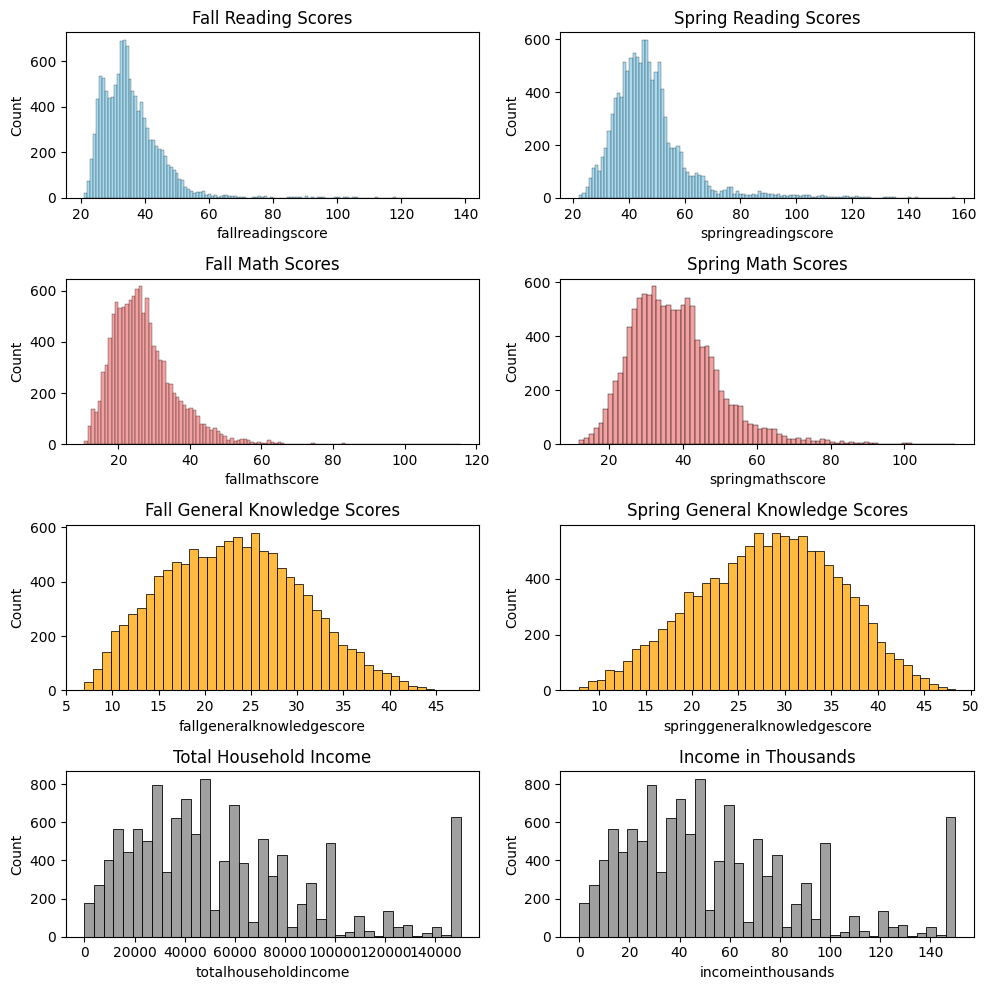

In [31]:
# Plot histograms for the numeric data
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
colors = ['skyblue', 'skyblue', 'lightcoral', 'lightcoral', 'orange', 'orange', 'grey', 'grey']

# Titles for each subplot
titles = [
    'Fall Reading Scores',
    'Spring Reading Scores',
    'Fall Math Scores',
    'Spring Math Scores',
    'Fall General Knowledge Scores',
    'Spring General Knowledge Scores',
    'Total Household Income',
    'Income in Thousands'
]

# Data for each subplot
data_columns = [
    'fallreadingscore',
    'springreadingscore',
    'fallmathscore',
    'springmathscore',
    'fallgeneralknowledgescore',
    'springgeneralknowledgescore',
    'totalhouseholdincome',
    'incomeinthousands'
]

# Plotting
for idx, ax in enumerate(axs.flat):
    sns.histplot(data[data_columns[idx]], kde=False, color=colors[idx], ax=ax)
    ax.set_title(titles[idx])

plt.tight_layout()
plt.show()


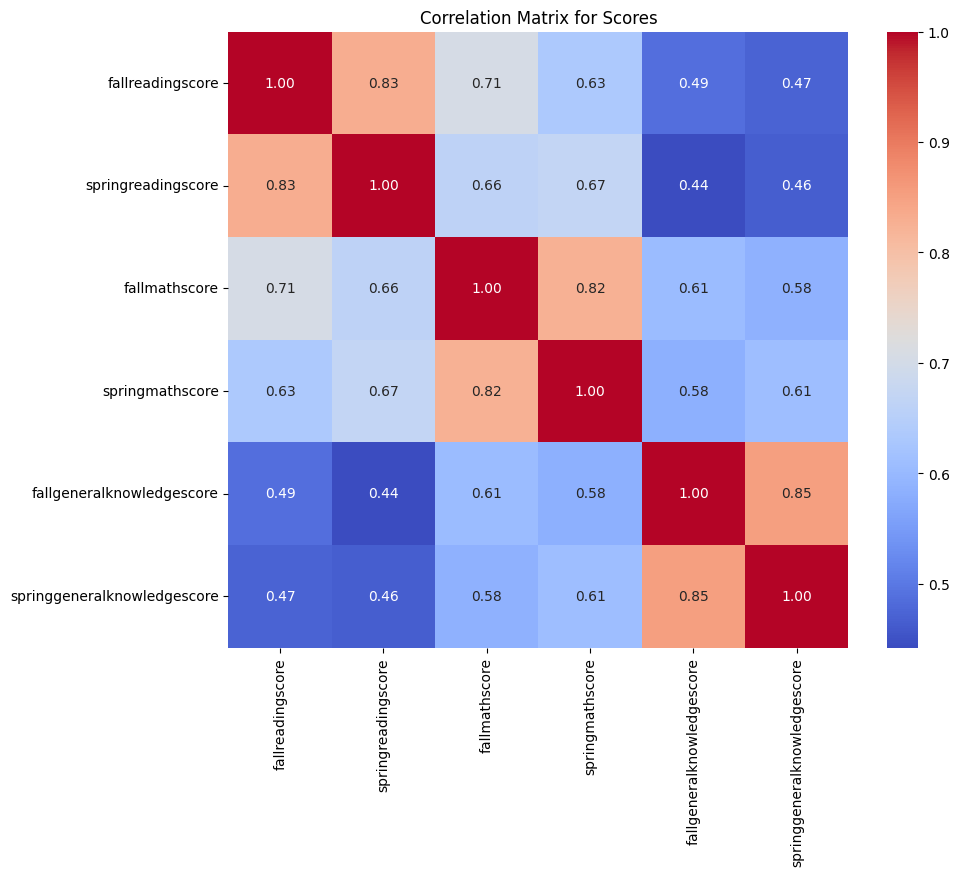

In [32]:
# Select relevant columns for the correlation matrix
scores_data = data[['fallreadingscore', 'springreadingscore', 'fallmathscore', 'springmathscore',
                    'fallgeneralknowledgescore', 'springgeneralknowledgescore']]

# Correlation matrix
correlation_matrix = scores_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Scores')
plt.show()

#RQ1: Composite Scores and Income Groups

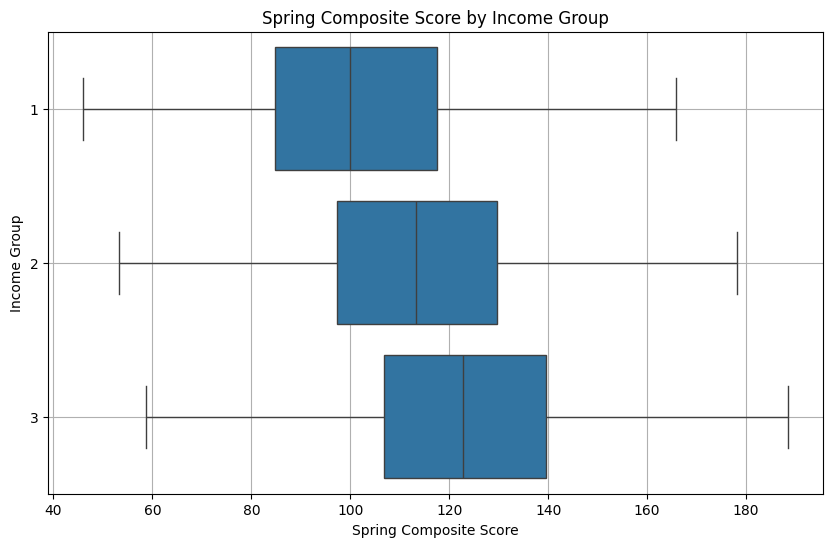

In [33]:
# Boxplot of springsumscore differentiated by incomegroups
plt.figure(figsize=(10, 6))
sns.boxplot(y='incomegroup', x='springsumscore', data=data, orient='h', showfliers=False)
plt.title('Spring Composite Score by Income Group')
plt.ylabel('Income Group')
plt.xlabel('Spring Composite Score')
plt.grid(True)
plt.show()


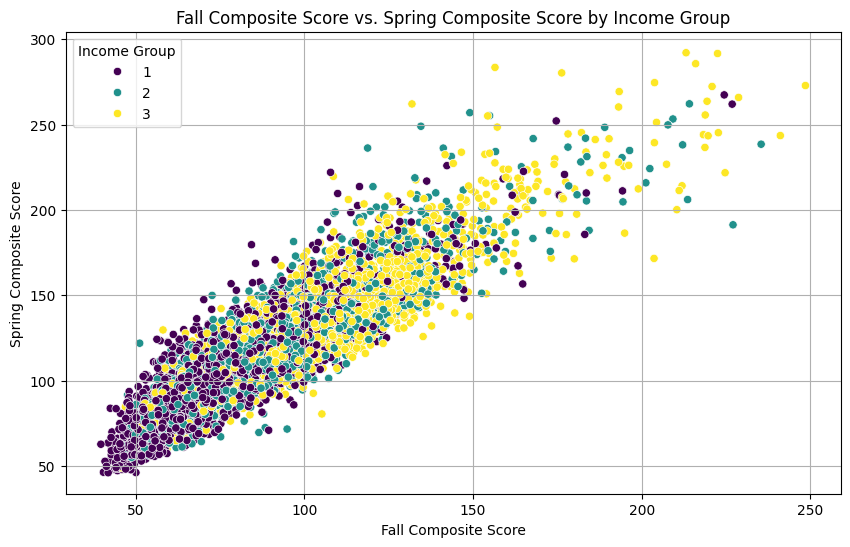

In [34]:
# Scatterplot of fallsumscore against springsumscore, differentiated by income groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fallsumscore', y='springsumscore', hue='incomegroup', palette='viridis', data=data)
plt.title('Fall Composite Score vs. Spring Composite Score by Income Group')
plt.xlabel('Fall Composite Score')
plt.ylabel('Spring Composite Score')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()

In [35]:
# ANOVA to test the effect of income group on springsumscore
anova_model = sm.formula.ols('springsumscore ~ C(incomegroup)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Testing assumptions of ANOVA
# 1. Normality assumption using the Shapiro-Wilk test
normality_test_results = {group: shapiro(data.loc[data['incomegroup'] == group, 'springsumscore']) for group in data['incomegroup'].unique()}

# 2. Homogeneity of variances assumption using Levene's test
levene_test_result = levene(data.loc[data['incomegroup'] == 1, 'springsumscore'],
                            data.loc[data['incomegroup'] == 2, 'springsumscore'],
                            data.loc[data['incomegroup'] == 3, 'springsumscore'])

(anova_table, normality_test_results, levene_test_result)

(                      sum_sq       df           F         PR(>F)
 C(incomegroup)  1.136497e+06      2.0  752.274988  2.038526e-308
 Residual        9.011602e+06  11930.0         NaN            NaN,
 {3: ShapiroResult(statistic=0.9283422231674194, pvalue=6.282286141237605e-38),
  2: ShapiroResult(statistic=0.9459741115570068, pvalue=6.035580336071843e-35),
  1: ShapiroResult(statistic=0.9608542919158936, pvalue=6.224221006262415e-34)},
 LeveneResult(statistic=13.10612342325759, pvalue=2.0621812350995604e-06))

In [36]:
# ANCOVA analysis
model_compositescore = sm.formula.ols('springsumscore ~ C(incomegroup) + fallsumscore', data=data).fit()
ancova_table = sm.stats.anova_lm(model_compositescore, typ=2)
# Show result
ancova_table

,sum_sq,df,F,PR(>F)
C(incomegroup),7.012567e+02,2.0,2.054860,0.128156
fallsumscore,6.976113e+06,1.0,40883.557448,0.000000
Residual,2.035489e+06,11929.0,NaN,NaN


In [37]:
# Assess normality of residuals for both ANCOVA analyses using the Shapiro-Wilk test
shapiro_result_composite = shapiro(model_compositescore.resid)
shapiro_result_composite

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9715154767036438, pvalue=3.1809475140173348e-43)

#RQ2: Income Group and Fall General Knowledge Score


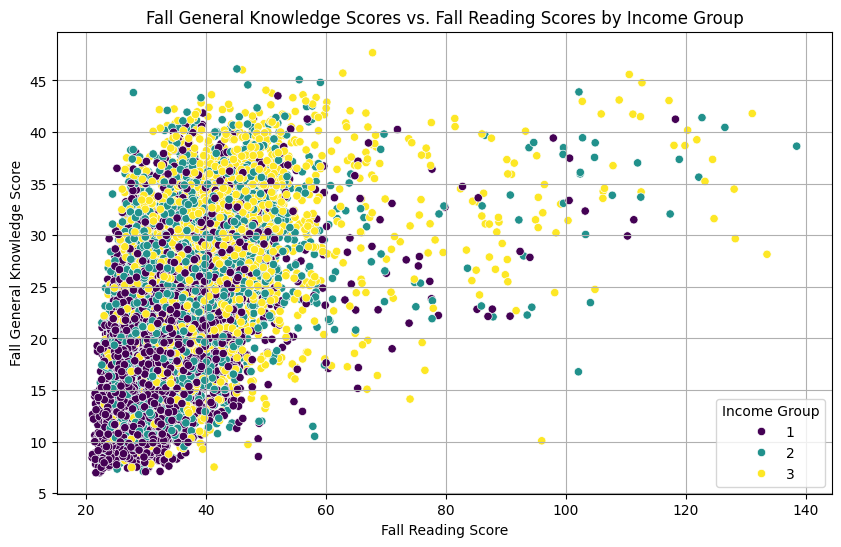

In [38]:
# Scatterplot of fall general knowledge scores against fall reading scores, differentiated by income groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fallreadingscore', y='fallgeneralknowledgescore', hue='incomegroup', palette='viridis', data=data)
plt.title('Fall General Knowledge Scores vs. Fall Reading Scores by Income Group')
plt.xlabel('Fall Reading Score')
plt.ylabel('Fall General Knowledge Score')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()


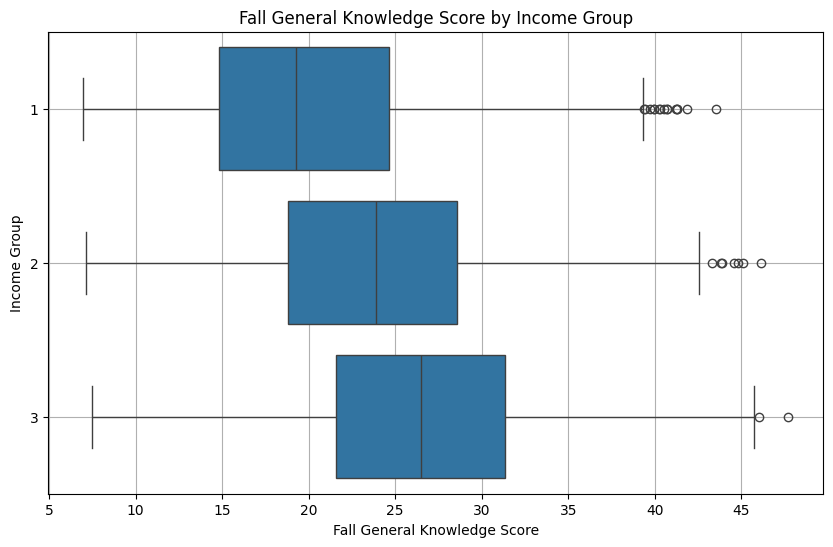

In [39]:
# Boxplot of fall general knowledge score categorized by income group
plt.figure(figsize=(10, 6))
sns.boxplot(y='incomegroup', x='fallgeneralknowledgescore', data=data, orient='h')
plt.title('Fall General Knowledge Score by Income Group')
plt.ylabel('Income Group')
plt.xlabel('Fall General Knowledge Score')
plt.grid(True)
plt.show()

In [40]:
# ANCOVA to analyze the effects of income levels on fall general knowledge scores, controlling for the influence of fall reading scores
model_gk = sm.formula.ols('fallgeneralknowledgescore ~ C(incomegroup) + fallreadingscore', data=data).fit()
ancova_table_gk = sm.stats.anova_lm(model_gk, typ=2)

ancova_table_gk

,sum_sq,df,F,PR(>F)
C(incomegroup),38477.156761,2.0,499.851851,3.428429e-209
fallreadingscore,105360.481465,1.0,2737.449236,0.000000e+00
Residual,459130.042211,11929.0,NaN,NaN


In [41]:
# Assess normality of residuals for both ANCOVA analyses using the Shapiro-Wilk test
shapiro_result_gk = shapiro(model_gk.resid)
shapiro_result_gk

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9981209635734558, pvalue=6.721319334435094e-11)